# **IMPORT LIBRARY DAN DATA**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#Import Data
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_excel('./drive/MyDrive/DATA/DataFinal2.xlsx')

Mounted at /content/drive


In [ ]:
data.head()

,NIS,NISN,Nama,JK,QH,AA,FIK,SKI,PPKn,BIND,...,IPS,BING,SB,PJOK,PRKTI,MULOK,Final Average Score,Certificate,School of Interest,Advanced School
0,2006341,97508412,AZIZAH,P,97.0,96.0,94.0,96.0,96.0,97.0,...,99.0,97.0,95.0,93.0,97.0,98.0,96.200000,Y,SMAN 1 SUMBAR,MAN INSAN CENDEKIA
1,2007365,96615619,IBNU HANAFI,L,97.0,95.0,94.0,95.0,96.0,93.0,...,98.0,97.0,96.0,96.0,95.0,98.0,95.666667,Y,MAN INSAN CENDEKIA,MAN INSAN CENDEKIA
2,2004593,58781203,NAKHIRA RAMADHANI,P,97.0,95.0,94.0,96.0,95.0,93.0,...,97.0,96.0,95.0,93.0,97.0,99.0,95.600000,Y,MAN INSAN CENDEKIA,MAN INSAN CENDEKIA
3,2003008,81095837,HANIFAH SALSABILA,P,96.0,95.0,94.0,94.0,93.0,96.0,...,98.0,97.0,95.0,94.0,97.0,98.0,95.400000,Y,MAN INSAN CENDEKIA,MAN INSAN CENDEKIA
4,2007787,77046869,AZIZAH PUTRI SHALEHAH,P,95.0,96.0,96.0,97.0,95.0,97.0,...,98.0,97.0,95.0,94.0,96.0,95.0,95.333333,Y,SMANSA,SMANSA


In [ ]:
numeric_cols = ['QH', 'AA', 'FIK', 'SKI', 'PPKn', 'BIND', 'BAR', 'MTK', 'IPA', 'IPS', 'BING', 'SB', 'PJOK', 'PRKTI', 'MULOK', 'Final Average Score']
# Rentang data numerik
for col in numeric_cols :
    print(col, "Min:", data[col].min(), ", Max", data[col].max())

QH Min: 75.0 , Max 98.0
AA Min: 80.0 , Max 98.0
FIK Min: 76.14 , Max 98.0
SKI Min: 79.42 , Max 98.0
PPKn Min: 79.52000000000001 , Max 98.0
BIND Min: 78.47999999999999 , Max 98.0
BAR Min: 76.54 , Max 98.8
MTK Min: 75.0 , Max 99.64
IPA Min: 75.0 , Max 98.0
IPS Min: 75.0 , Max 99.0
BING Min: 77.64 , Max 98.32
SB Min: 77.64 , Max 98.0
PJOK Min: 75.0 , Max 98.0
PRKTI Min: 78.52 , Max 98.0
MULOK Min: 74.0 , Max 99.28
Final Average Score Min: 83.49874667 , Max 96.2


# **DATA PREPROCESSING**

In [ ]:
print(data.shape)

(1496, 23)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NIS                  1496 non-null   int64  
 1   NISN                 1496 non-null   int64  
 2   Nama                 1496 non-null   object 
 3   JK                   1496 non-null   object 
 4   QH                   1496 non-null   float64
 5   AA                   1496 non-null   float64
 6   FIK                  1496 non-null   float64
 7   SKI                  1496 non-null   float64
 8   PPKn                 1496 non-null   float64
 9   BIND                 1496 non-null   float64
 10  BAR                  1496 non-null   float64
 11  MTK                  1496 non-null   float64
 12  IPA                  1496 non-null   float64
 13  IPS                  1496 non-null   float64
 14  BING                 1496 non-null   float64
 15  SB                   1496 non-null   f

In [ ]:
print(data.isnull().sum())

NIS                    0
NISN                   0
Nama                   0
JK                     0
QH                     0
AA                     0
FIK                    0
SKI                    0
PPKn                   0
BIND                   0
BAR                    0
MTK                    0
IPA                    0
IPS                    0
BING                   0
SB                     0
PJOK                   0
PRKTI                  0
MULOK                  0
Final Average Score    0
Certificate            0
School of Interest     0
Advanced School        0
dtype: int64


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
#menampilkan jumlah variabel target
print(data['School of Interest'].value_counts())

School of Interest
SMANSA                516
SMAN 1 SUMBAR         348
SMAN 2 PP             325
MAN INSAN CENDEKIA    307
Name: count, dtype: int64


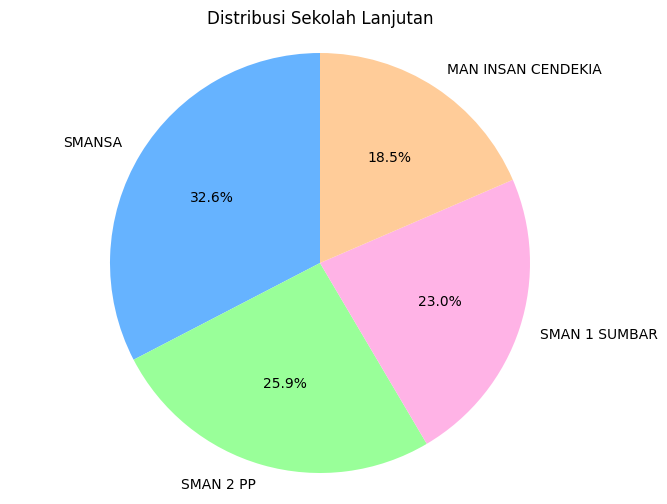

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah nilai untuk variabel 'SEKOLAH LANJUTAN'
school_counts = data['Advanced School'].value_counts()

# Membuat diagram pie
plt.figure(figsize=(8, 6))
plt.pie(school_counts, labels=school_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffb3e6','#ffcc99'])
plt.title('Distribusi Sekolah Lanjutan')
plt.axis('equal')
plt.show()

In [ ]:
#menampilkan fitur non numerik
print(data['Certificate'].value_counts())
print()
print(data['School of Interest'].value_counts())

Certificate
N    877
Y    619
Name: count, dtype: int64

School of Interest
SMANSA                516
SMAN 1 SUMBAR         348
SMAN 2 PP             325
MAN INSAN CENDEKIA    307
Name: count, dtype: int64


DATA CLEANING

In [ ]:
#hapus kolom yg tdk digunakan, nilai null, nilai duplikat
data_bersih = data.drop(columns=['NIS', 'NISN', 'Nama', 'JK']).dropna().drop_duplicates()

In [ ]:
print(data_bersih.shape)

(1496, 19)


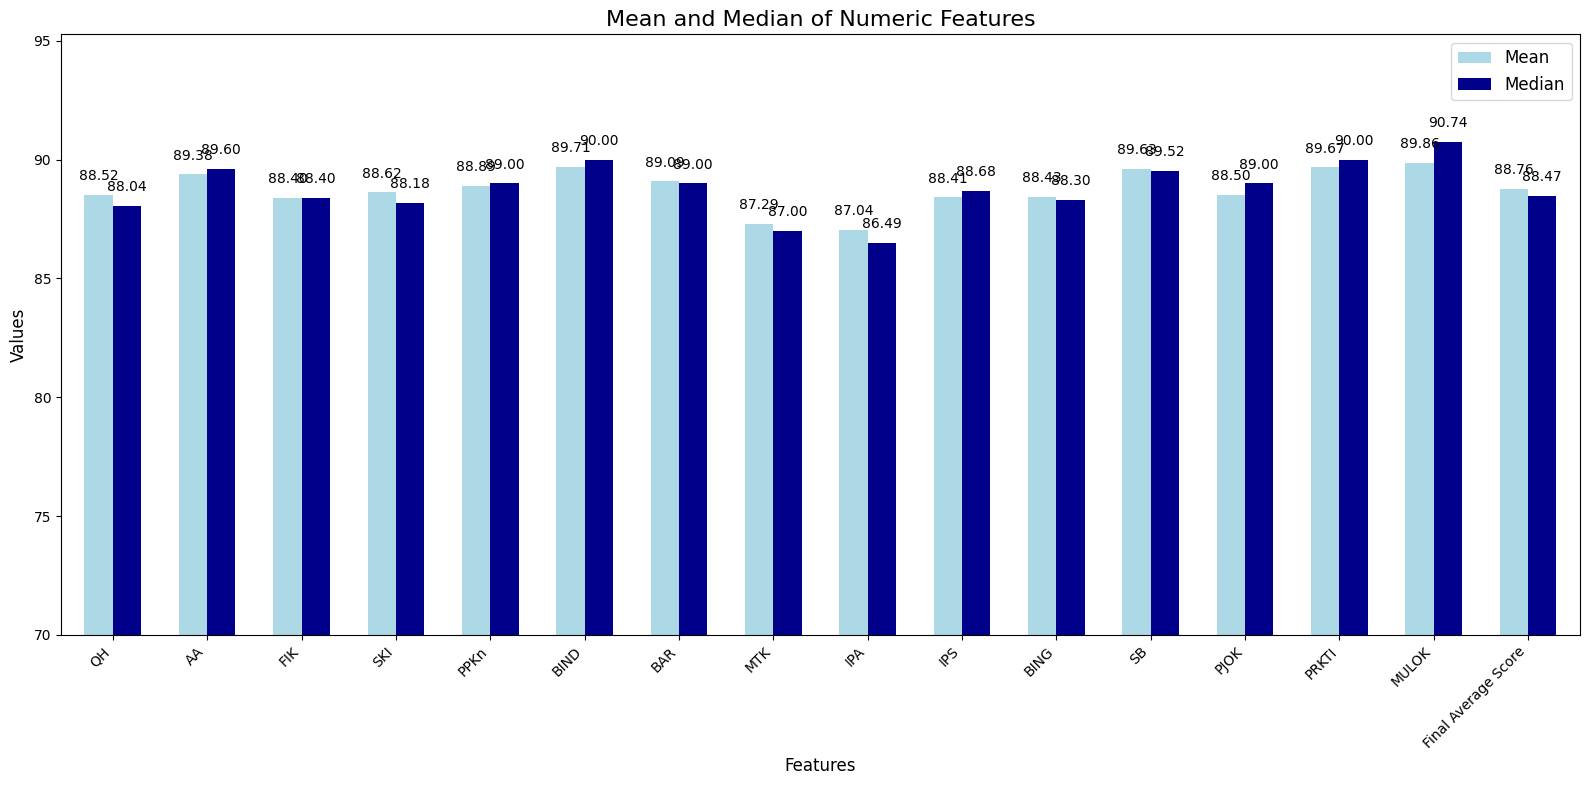

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung mean dan median untuk setiap kolom numerik
mean_values = data[numeric_cols].mean()
median_values = data[numeric_cols].median()

# Buat DataFrame untuk visualisasi
summary_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values
})

# Plot mean dan median untuk setiap fitur
fig, ax = plt.subplots(figsize=(16, 8))
bars = summary_df.plot(kind='bar', ax=ax, color=['lightblue', 'darkblue'], width=0.6)

# Tambahkan teks
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}',
                ha='center', va='bottom', fontsize=10)

# judul dan label
ax.set_title('Mean and Median of Numeric Features', fontsize=16)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_xticks(range(len(summary_df)))
ax.set_xticklabels(summary_df.index, rotation=45, ha='right', fontsize=10)
ax.set_ylim(70, None)

# Add legend
ax.legend(['Mean', 'Median'], loc='upper right', fontsize=12)

# Sesuaikan jarak untuk mencegah tumpang tindih
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Show plot
plt.show()

In [ ]:
print(data_bersih['School of Interest'].value_counts())

School of Interest
SMANSA                516
SMAN 1 SUMBAR         348
SMAN 2 PP             325
MAN INSAN CENDEKIA    307
Name: count, dtype: int64


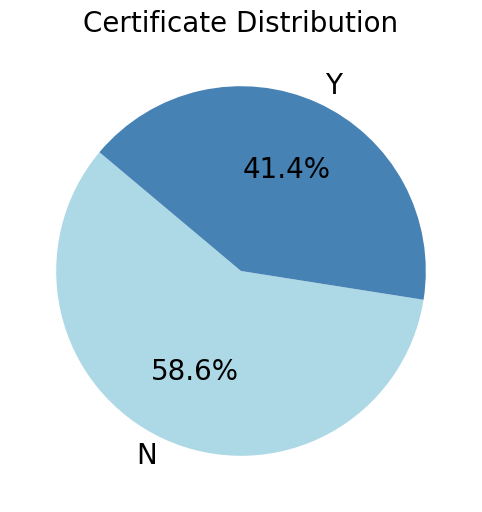

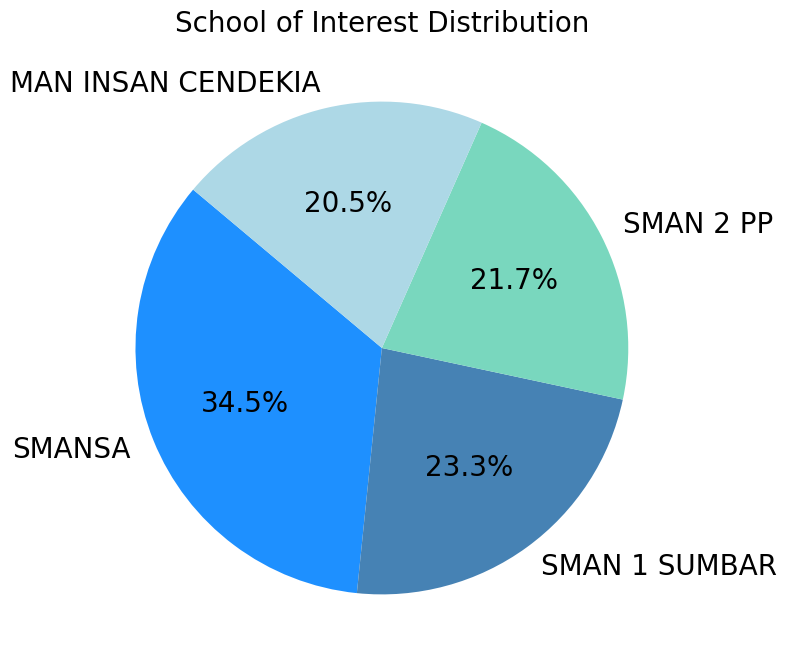

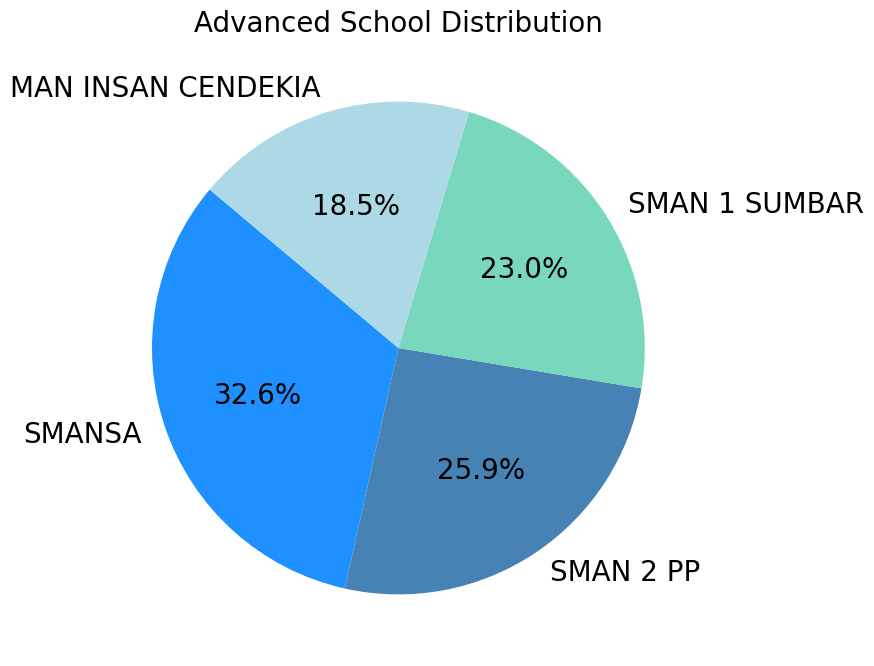

In [ ]:
import matplotlib.pyplot as plt

# Pie chart untuk 'Certificate'
certificate_counts = data['Certificate'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    certificate_counts,
    labels=certificate_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightblue', 'steelblue'],
    textprops={'fontsize': 20}
)
plt.title('Certificate Distribution', fontsize=20)
plt.show()

# Pie chart untuk 'School of Interest'
school_interest_counts = data['School of Interest'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(
    school_interest_counts,
    labels=school_interest_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['dodgerblue', 'steelblue', '#79D7BE', 'lightblue'],
    textprops={'fontsize': 20}
)
plt.title('School of Interest Distribution', fontsize=20)
plt.show()

# Pie chart untuk 'Advanced School'
advanced_school_counts = data['Advanced School'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(
    advanced_school_counts,
    labels=advanced_school_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['dodgerblue', 'steelblue', '#79D7BE', 'lightblue'],
    textprops={'fontsize': 20}
)
plt.title('Advanced School Distribution', fontsize=20)
plt.show()


VISUALISASI DATA AWAL

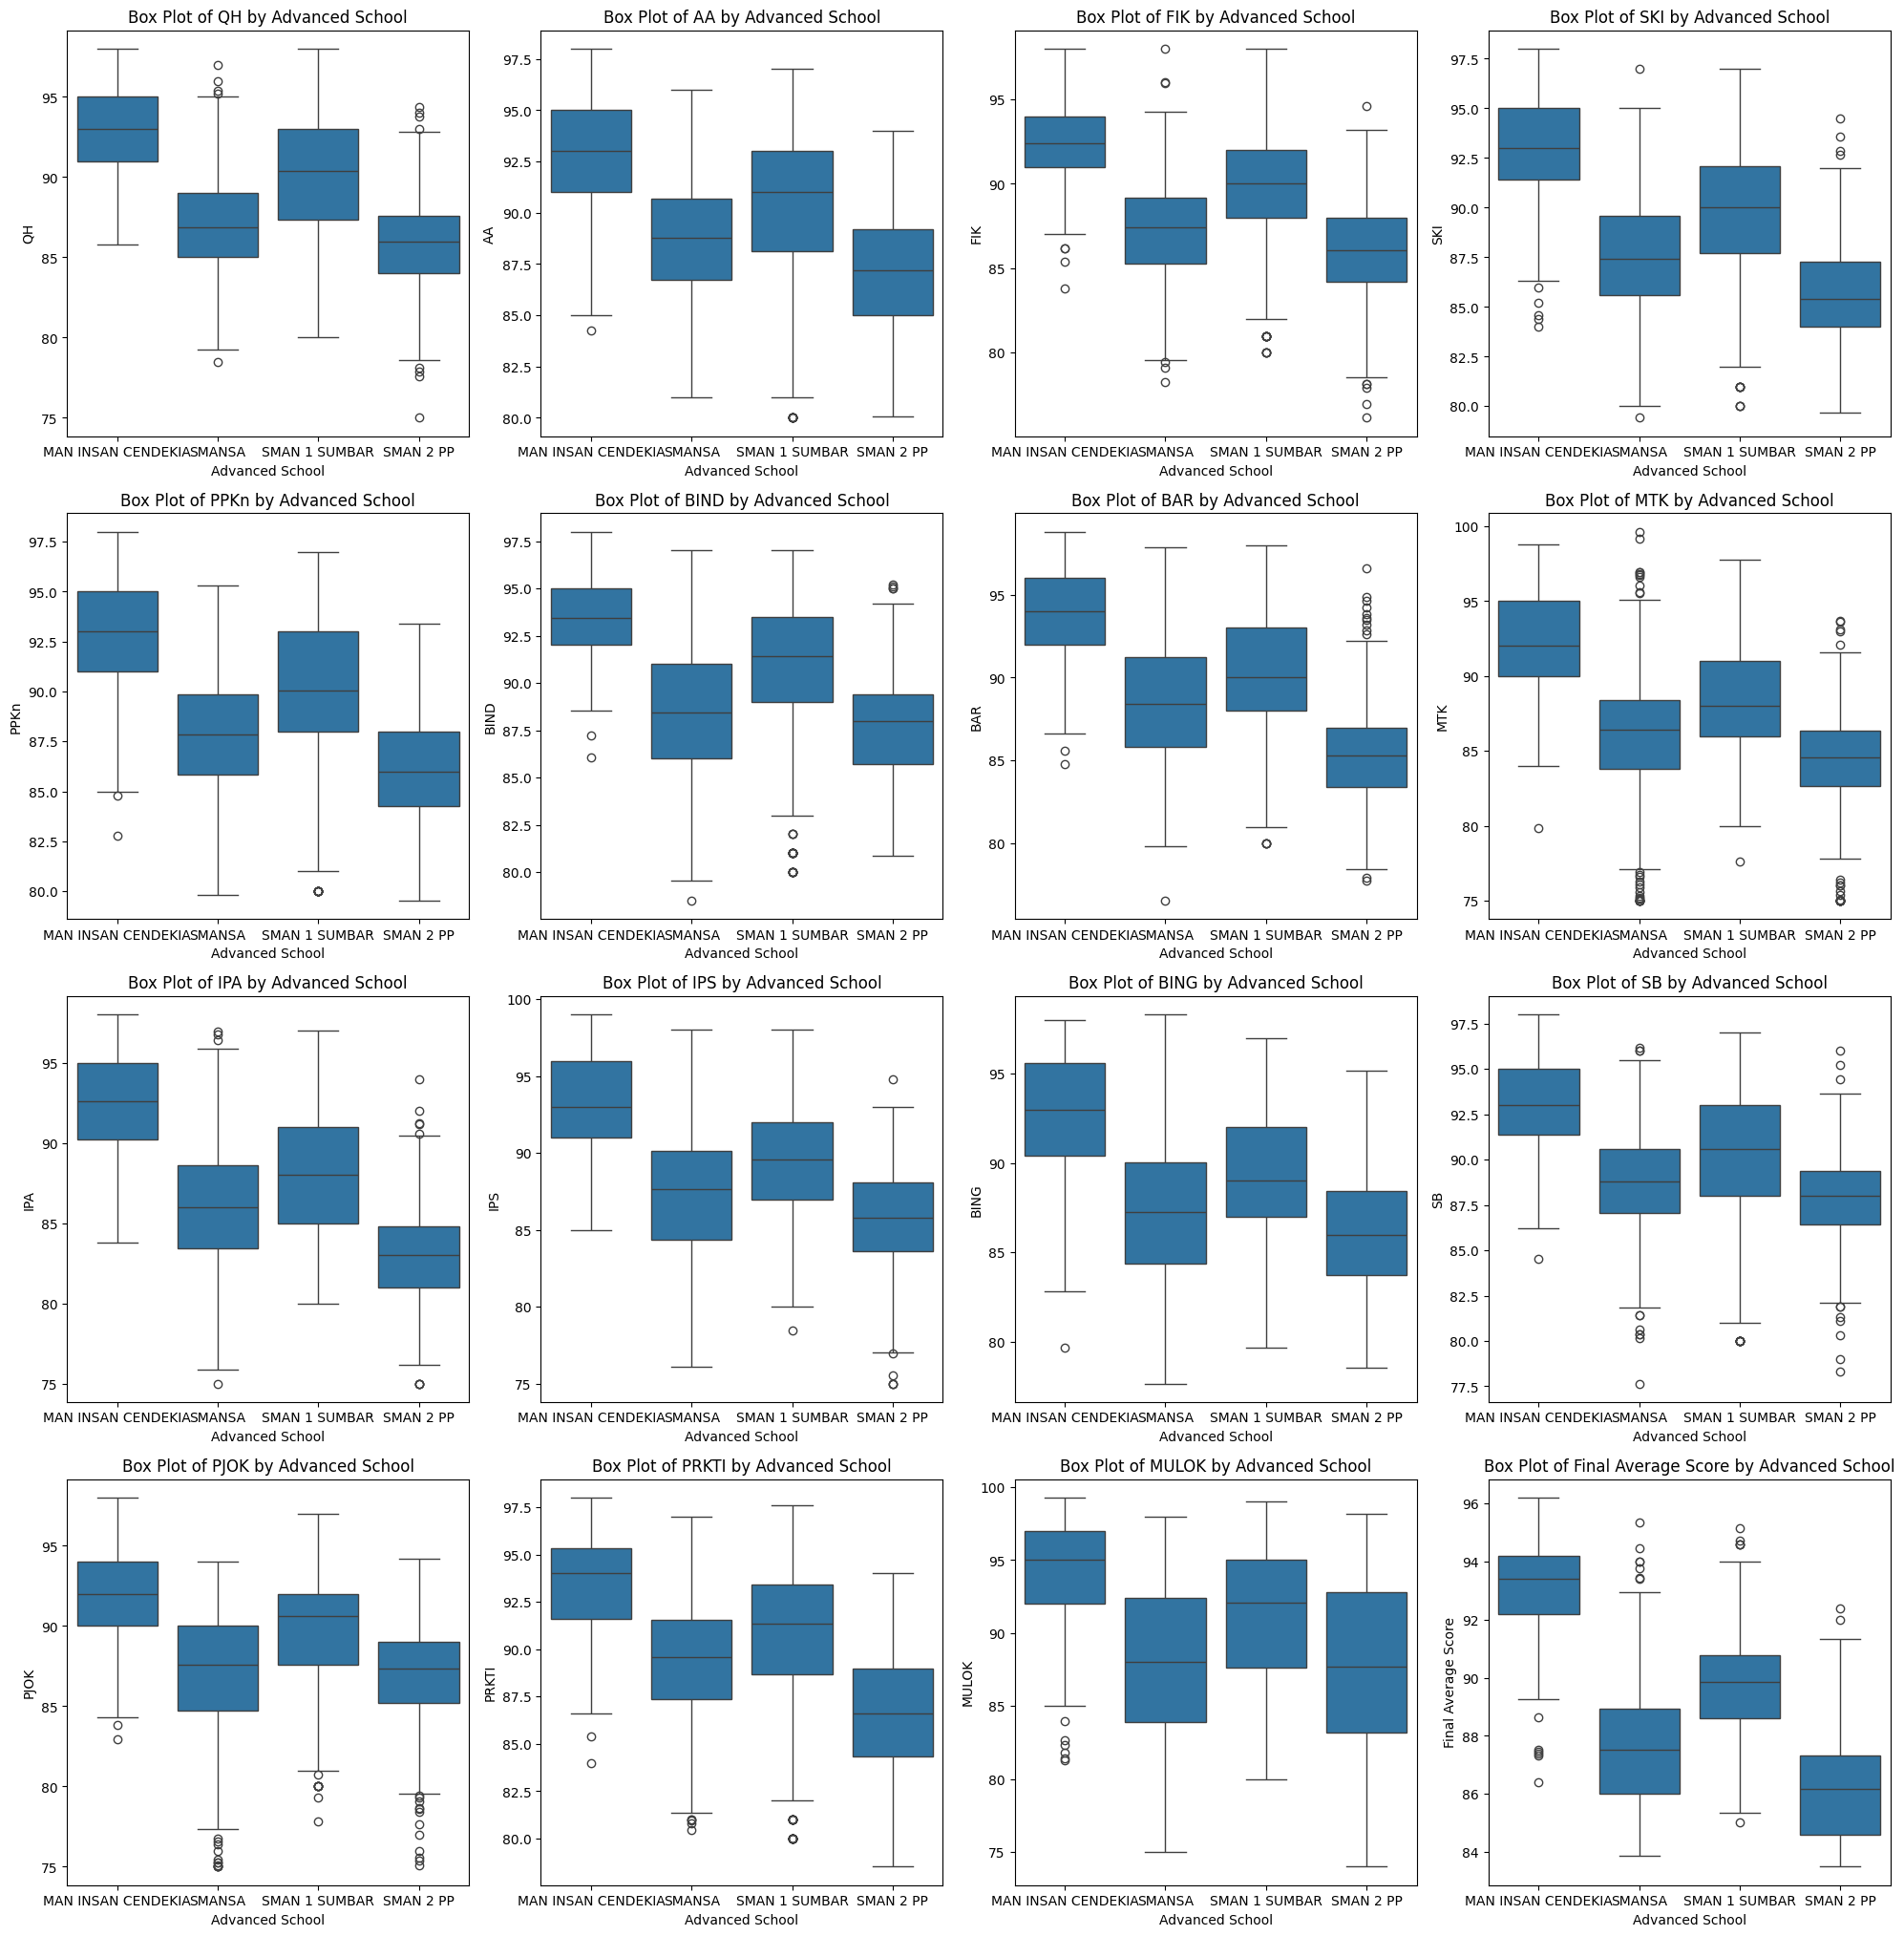

In [ ]:
# Visualisasi hubungan antara fitur numerik dan target dengan Box Plot
features = ['QH', 'AA', 'FIK', 'SKI', 'PPKn', 'BIND', 'BAR', 'MTK', 'IPA', 'IPS', 'BING', 'SB', 'PJOK', 'PRKTI', 'MULOK', 'Final Average Score']

plt.figure(figsize=(20, 25))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x='Advanced School', y=feature, data=data_bersih)
    plt.title(f'Box Plot of {feature} by Advanced School')
    plt.xlabel('Advanced School')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

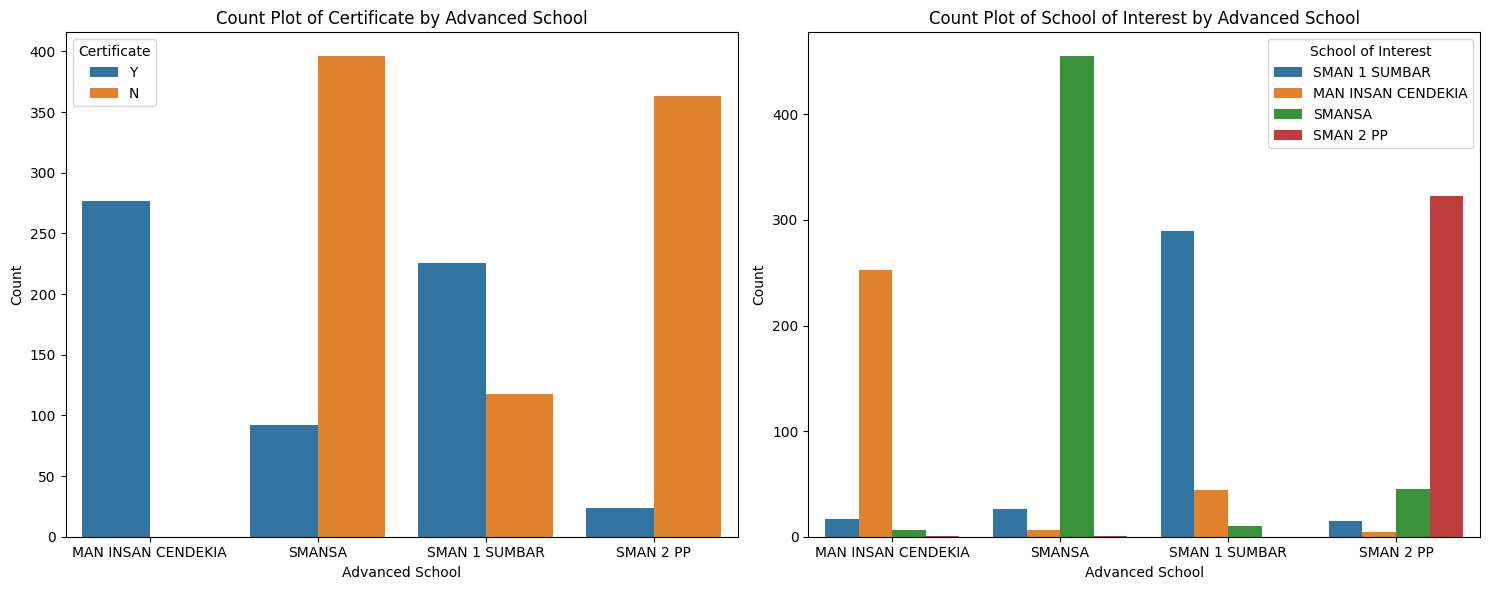

In [ ]:
# Visualisasi hubungan fitur kategorikal dengan target
categorical_features = ['Certificate', 'School of Interest']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x='Advanced School', hue=feature, data=data_bersih)
    plt.title(f'Count Plot of {feature} by Advanced School')
    plt.xlabel('Advanced School')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
#Encoding fitur
label_encoder = LabelEncoder()

data_bersih['Certificate'] = label_encoder.fit_transform(data['Certificate'])
data_bersih['School of Interest'] = label_encoder.fit_transform(data['School of Interest'])

In [ ]:
print(data_bersih['Certificate'].value_counts())

Certificate
0    877
1    619
Name: count, dtype: int64


In [ ]:
print(data_bersih.shape)

(1496, 19)


In [ ]:
data_bersih.head()

,QH,AA,FIK,SKI,PPKn,BIND,BAR,MTK,IPA,IPS,BING,SB,PJOK,PRKTI,MULOK,Final Average Score,Certificate,School of Interest,Advanced School
0,97.0,96.0,94.0,96.0,96.0,97.0,98.0,96.0,94.0,99.0,97.0,95.0,93.0,97.0,98.0,96.200000,1,1,MAN INSAN CENDEKIA
1,97.0,95.0,94.0,95.0,96.0,93.0,95.0,95.0,95.0,98.0,97.0,96.0,96.0,95.0,98.0,95.666667,1,0,MAN INSAN CENDEKIA
2,97.0,95.0,94.0,96.0,95.0,93.0,96.0,95.0,96.0,97.0,96.0,95.0,93.0,97.0,99.0,95.600000,1,0,MAN INSAN CENDEKIA
3,96.0,95.0,94.0,94.0,93.0,96.0,96.0,95.0,93.0,98.0,97.0,95.0,94.0,97.0,98.0,95.400000,1,0,MAN INSAN CENDEKIA
4,95.0,96.0,96.0,97.0,95.0,97.0,95.0,89.0,95.0,98.0,97.0,95.0,94.0,96.0,95.0,95.333333,1,3,SMANSA


Mengatasi Outlier

In [ ]:
numeric_data = data_bersih.select_dtypes(include=[np.number])
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
data_bersih = data_bersih[~((numeric_data < (Q1 - 2 * IQR)) | (numeric_data > (Q3 + 2 * IQR))).any(axis=1)]

In [ ]:
print(data_bersih.shape)

(1483, 19)


In [ ]:
data_bersih.head()

,QH,AA,FIK,SKI,PPKn,BIND,BAR,MTK,IPA,IPS,BING,SB,PJOK,PRKTI,MULOK,Final Average Score,Certificate,School of Interest,Advanced School
0,97.0,96.0,94.0,96.0,96.0,97.0,98.0,96.0,94.0,99.0,97.0,95.0,93.0,97.0,98.0,96.200000,1,1,MAN INSAN CENDEKIA
1,97.0,95.0,94.0,95.0,96.0,93.0,95.0,95.0,95.0,98.0,97.0,96.0,96.0,95.0,98.0,95.666667,1,0,MAN INSAN CENDEKIA
2,97.0,95.0,94.0,96.0,95.0,93.0,96.0,95.0,96.0,97.0,96.0,95.0,93.0,97.0,99.0,95.600000,1,0,MAN INSAN CENDEKIA
3,96.0,95.0,94.0,94.0,93.0,96.0,96.0,95.0,93.0,98.0,97.0,95.0,94.0,97.0,98.0,95.400000,1,0,MAN INSAN CENDEKIA
4,95.0,96.0,96.0,97.0,95.0,97.0,95.0,89.0,95.0,98.0,97.0,95.0,94.0,96.0,95.0,95.333333,1,3,SMANSA


Standarisasi Data

In [ ]:
numeric_columns = data_bersih.select_dtypes(include=[np.number]).columns
# Inisialisasi scaler dan melakukan scaling
scaler = StandardScaler()
data_bersih[numeric_columns] = scaler.fit_transform(data_bersih[numeric_columns]).round(2)

<ipython-input-25-f69068959dbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bersih[numeric_columns] = scaler.fit_transform(data_bersih[numeric_columns]).round(2)


In [ ]:
data_bersih.head()

,QH,AA,FIK,SKI,PPKn,BIND,BAR,MTK,IPA,IPS,BING,SB,PJOK,PRKTI,MULOK,Final Average Score,Certificate,School of Interest,Advanced School
0,2.02,1.77,1.46,1.89,1.82,1.91,2.01,1.84,1.48,2.32,1.93,1.53,1.07,1.82,1.42,2.47,1.18,-0.61,MAN INSAN CENDEKIA
1,2.02,1.50,1.46,1.63,1.82,0.86,1.33,1.63,1.69,2.10,1.93,1.82,1.81,1.32,1.42,2.29,1.18,-1.48,MAN INSAN CENDEKIA
2,2.02,1.50,1.46,1.89,1.56,0.86,1.56,1.63,1.90,1.88,1.70,1.53,1.07,1.82,1.60,2.27,1.18,-1.48,MAN INSAN CENDEKIA
3,1.78,1.50,1.46,1.38,1.05,1.64,1.56,1.63,1.26,2.10,1.93,1.53,1.32,1.82,1.42,2.20,1.18,-1.48,MAN INSAN CENDEKIA
4,1.54,1.77,1.98,2.14,1.56,1.91,1.33,0.35,1.69,2.10,1.93,1.53,1.32,1.57,0.89,2.18,1.18,1.14,SMANSA


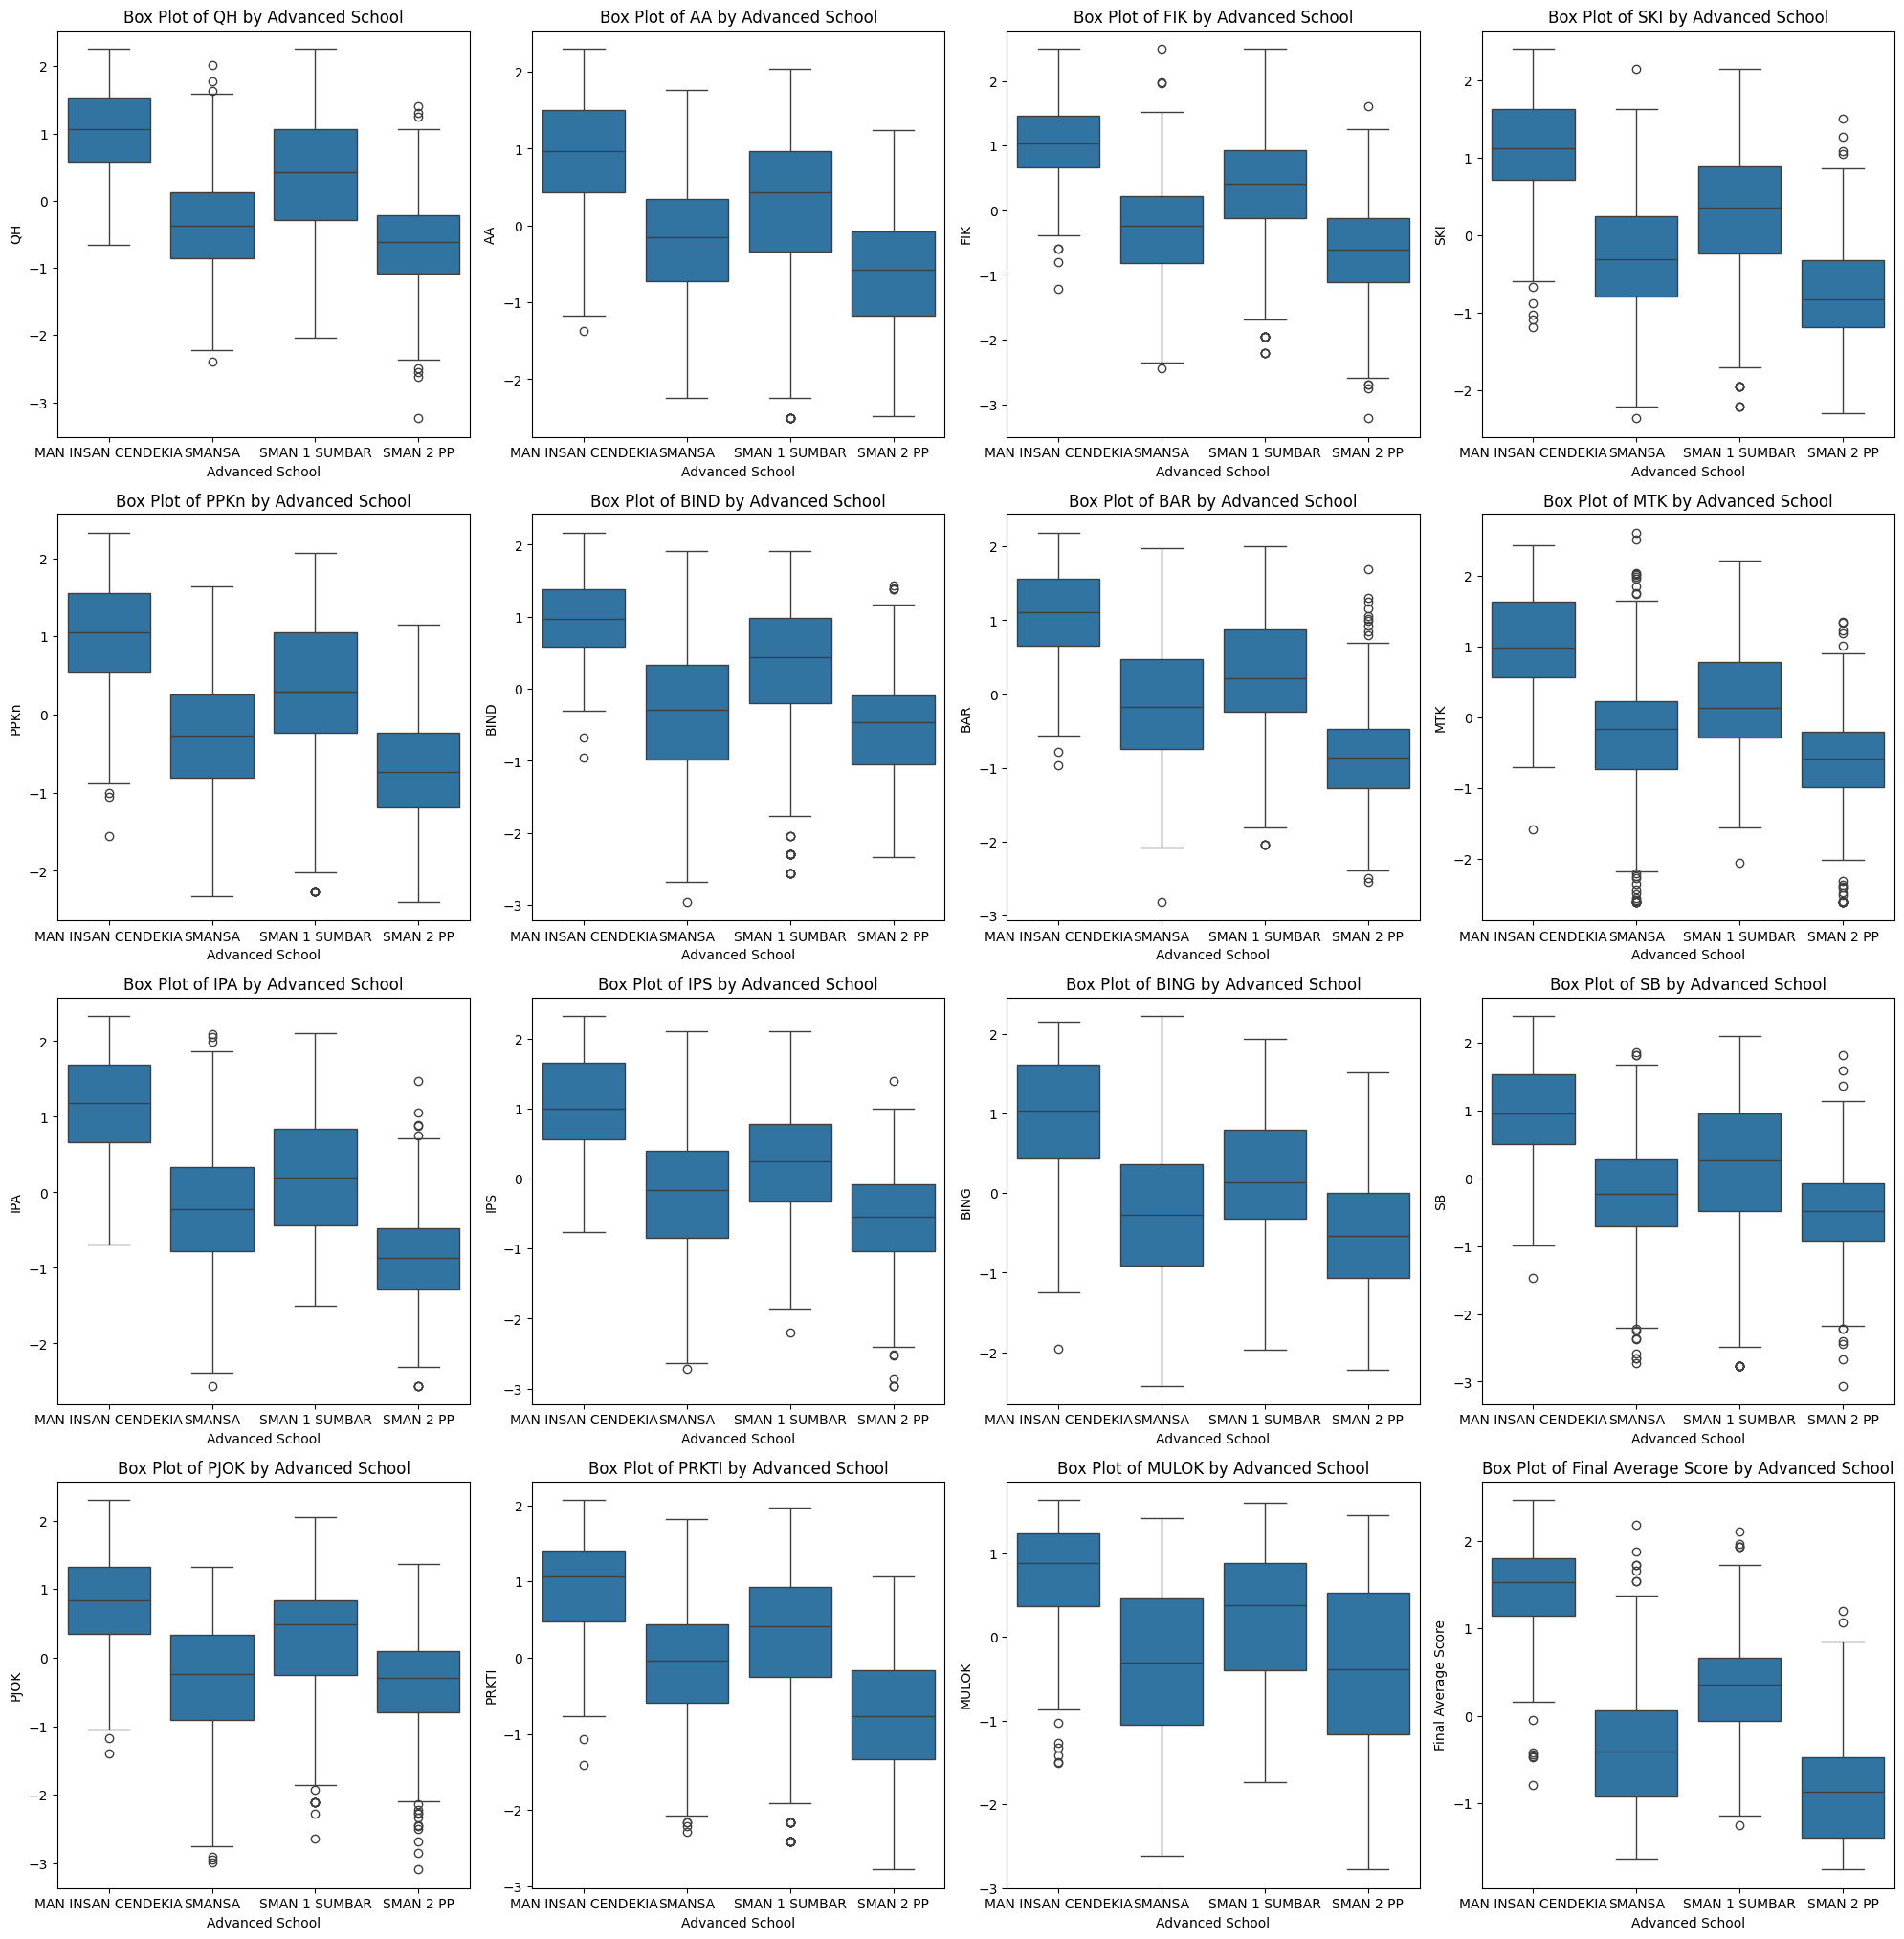

In [ ]:
# Visualisasi hubungan antara fitur numerik dan target dengan Box Plot
features = ['QH', 'AA', 'FIK', 'SKI', 'PPKn', 'BIND', 'BAR', 'MTK', 'IPA', 'IPS', 'BING', 'SB', 'PJOK', 'PRKTI', 'MULOK', 'Final Average Score']

plt.figure(figsize=(20, 25))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x='Advanced School', y=feature, data=data_bersih)
    plt.title(f'Box Plot of {feature} by Advanced School')
    plt.xlabel('Advanced School')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [ ]:
print(data_bersih['School of Interest'].value_counts())

School of Interest
 1.14    506
-0.61    348
 0.27    322
-1.48    307
Name: count, dtype: int64


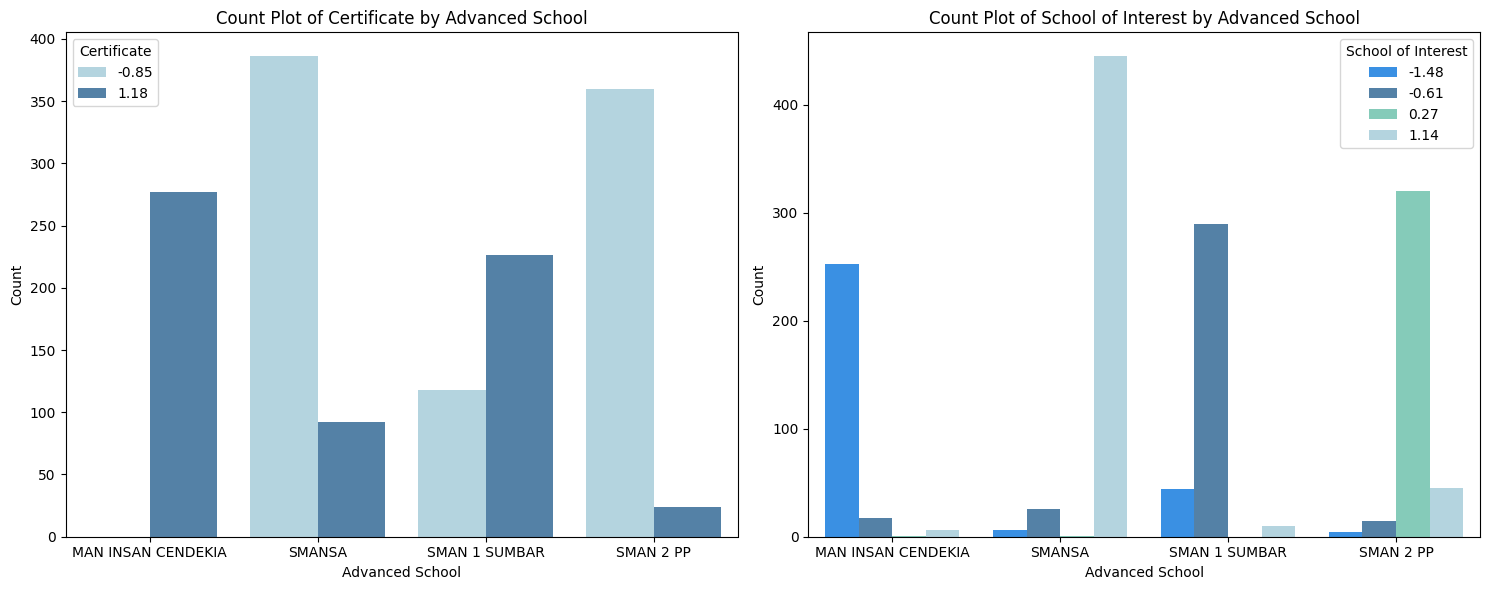

In [ ]:
#N = lightblue
#Y = steelblue
#man: dodgerblue
#sman2: 79D7BE
#smansa: lightblue
#smansum: steelblue
# Warna yang sesuai dengan pie diagram

palette_certificate = ['lightblue', 'steelblue']
palette_school_interest = ['dodgerblue',  'steelblue', '#79D7BE', 'lightblue']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    if feature == 'Certificate':
        sns.countplot(x='Advanced School', hue=feature, data=data_bersih, palette=palette_certificate)
    elif feature == 'School of Interest':
        sns.countplot(x='Advanced School', hue=feature, data=data_bersih, palette=palette_school_interest)
    plt.title(f'Count Plot of {feature} by Advanced School')
    plt.xlabel('Advanced School')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Fitur Selection


Hasil Uji ANOVA:

Fitur: QH, P-Value ANOVA: 9.281296894594125e-164
Fitur: AA, P-Value ANOVA: 4.6797092416795857e-122
Fitur: FIK, P-Value ANOVA: 3.5884315613472993e-147
Fitur: SKI, P-Value ANOVA: 1.6101324219468868e-172
Fitur: PPKn, P-Value ANOVA: 6.590451662607071e-156
Fitur: BIND, P-Value ANOVA: 5.98261217314875e-108
Fitur: BAR, P-Value ANOVA: 1.3233832022004609e-163
Fitur: MTK, P-Value ANOVA: 4.365924059790047e-127
Fitur: IPA, P-Value ANOVA: 2.5658054985540007e-188
Fitur: IPS, P-Value ANOVA: 9.951037027921878e-123
Fitur: BING, P-Value ANOVA: 3.034327010198804e-112
Fitur: SB, P-Value ANOVA: 5.038275064118206e-103
Fitur: PJOK, P-Value ANOVA: 9.584391551375216e-88
Fitur: PRKTI, P-Value ANOVA: 7.790618105941566e-122
Fitur: MULOK, P-Value ANOVA: 5.406162376255606e-65
Fitur: Certificate, P-Value ANOVA: 7.32664482021871e-233
Fitur: School of Interest, P-Value ANOVA: 0.0
Fitur: Final Average Score, P-Value ANOVA: 1e-323

ANOVA Results Sorted by P-Value:
                   Fitur        P-Val

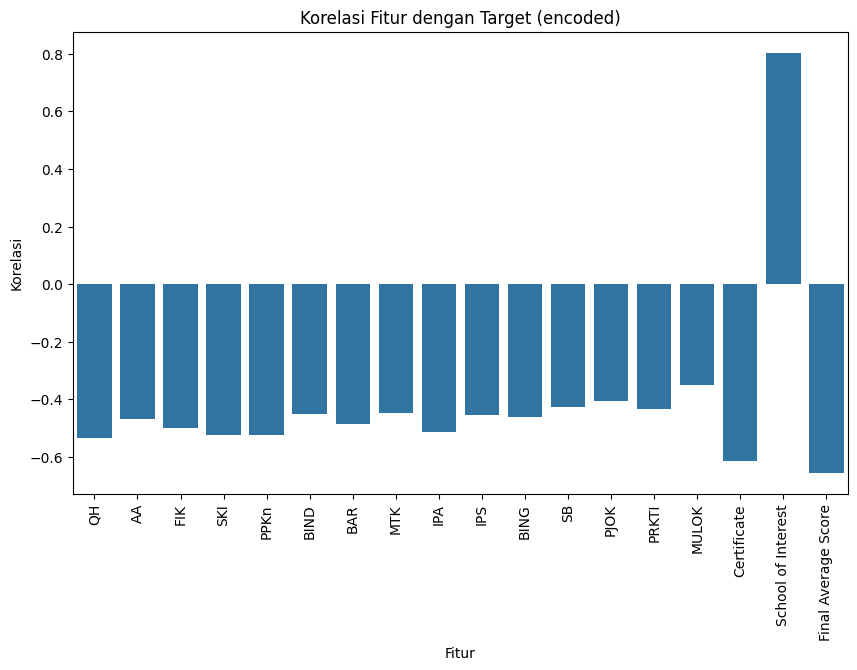

In [ ]:
# Import libraries
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import f_oneway

features = ['QH', 'AA', 'FIK', 'SKI', 'PPKn', 'BIND', 'BAR', 'MTK', 'IPA', 'IPS', 'BING', 'SB', 'PJOK', 'PRKTI', 'MULOK', 'Certificate', 'School of Interest', 'Final Average Score']
X = data_bersih[features]  # Mengambil fitur yang telah ditentukan
y = data_bersih['Advanced School']  # Variabel target

# Encode variabel target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# A. Uji ANOVA untuk setiap fitur terhadap target
print("\nHasil Uji ANOVA:\n")
anova_results = {}
for feature in features:
    unique_targets = data_bersih['Advanced School'].unique()
    # Membuat grup untuk ANOVA berdasarkan kategori target
    groups = [data_bersih[data_bersih['Advanced School'] == target][feature] for target in unique_targets]
    f_stat, p_val = f_oneway(*groups)
    anova_results[feature] = p_val
    print(f"Fitur: {feature}, P-Value ANOVA: {p_val}")

# Menampilkan hasil ANOVA dalam DataFrame agar lebih mudah dibaca
anova_df = pd.DataFrame(list(anova_results.items()), columns=['Fitur', 'P-Value'])
anova_df.sort_values(by='P-Value', inplace=True)
print("\nANOVA Results Sorted by P-Value:\n", anova_df)

# B. Mutual Information
print("\nHasil Mutual Information:\n")
mi = mutual_info_classif(X, y_encoded)  # Menghitung mutual information antara setiap fitur dan target
mi_series = pd.Series(mi, index=features).sort_values(ascending=False)
print(mi_series)

# C. Korelasi dengan variabel target yang sudah diencoding
print("\nKorelasi Fitur dengan Target (encoded):\n")
correlations = X.apply(lambda x: x.corr(pd.Series(y_encoded)), axis=0)
print(correlations)

# Visualisasi Korelasi
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.title("Korelasi Fitur dengan Target (encoded)")
plt.xlabel("Fitur")
plt.ylabel("Korelasi")
plt.show()

In [ ]:
# Menampilkan 5 fitur terbaik berdasarkan P-Value terendah
top_5_features_anova = anova_df.sort_values(by='P-Value').head(6)

print("\n5 Fitur Terbaik Berdasarkan Uji ANOVA (P-Value Terendah):")
print(top_5_features_anova)


5 Fitur Terbaik Berdasarkan Uji ANOVA (P-Value Terendah):
                  Fitur        P-Value
16   School of Interest   0.000000e+00
17  Final Average Score  9.881313e-324
15          Certificate  7.326645e-233
8                   IPA  2.565805e-188
3                   SKI  1.610132e-172
0                    QH  9.281297e-164


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# X = data_bersih[['School of Interest','Final Average Score', 'Certificate', 'IPA', 'SKI', 'QH']] #88 anova
X = data_bersih[['QH','AA', 'FIK', 'Final Average Score','Certificate', 'School of Interest']] #92 liat boxplot
y = data_bersih['Advanced School']

#encoder variabel target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#pembagian data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Menggunakan SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Sebelum SMOTE
print("Distribusi awal:", Counter(y_train))

# Definisikan target jumlah sampel per kelas
sampling_strategy = {
    0: 277,  # MAN Insan Cendekia
    1: 344,  # SMAN 1 SUMBAR
    2: 387,  # SMAN 2 PP
    3: 488   # SMAN 1 PP (SMANSA)
}

# Terapkan SMOTE dengan target jumlah sampel
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_train_resampled))

Distribusi awal: Counter({3: 372, 2: 311, 1: 283, 0: 220})
Distribusi setelah SMOTE: Counter({3: 488, 2: 387, 1: 344, 0: 277})


In [ ]:
# # Menggabungkan kembali fitur dan label dalam DataFrame
# df_smote = pd.DataFrame(X_train_resampled, columns=X.columns)  # X adalah fitur awal
# df_smote['Advanced School'] = y_train_resampled  # Menambahkan label

# # Menampilkan beberapa baris pertama
# print(df_smote)

            QH        AA       FIK  Final Average Score  Certificate  \
0     0.540000  0.270000  0.460000             0.390000         1.18   
1     1.780000 -1.440000 -1.950000            -0.350000        -0.85   
2     1.300000  0.490000  0.670000             0.830000         1.18   
3    -0.610000 -0.900000 -1.370000            -0.810000        -0.85   
4     1.540000  1.500000  0.670000             1.870000         1.18   
...        ...       ...       ...                  ...          ...   
1491  0.263527  0.255891 -0.017980             0.271370         1.18   
1492  0.318868  0.606104  0.762207             0.221132         1.18   
1493 -1.147583 -0.726049 -0.540000            -1.019363        -0.85   
1494 -0.577061 -0.881292 -0.438235            -0.808116        -0.85   
1495  0.648363  0.356444  0.867852             1.041021         1.18   

      School of Interest  Advanced School  
0                   1.14                3  
1                  -0.61                1  
2  

In [ ]:
# print(pd.Series(y_encoded).value_counts())

In [ ]:
# Membuat dan melatih model KNN
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import pairwise_distances
# import numpy as np

# # Contoh model KNN
# knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Pastikan metric Euclidean
# knn.fit(X_train, y_train)

# # Ambil beberapa sampel dari data uji
# X_sample = X_test[:5]  # Ambil 5 sampel untuk ditampilkan

# # Hitung jarak Euclidean antara setiap sampel dengan data latih
# distances, indices = knn.kneighbors(X_sample)

# # Menampilkan jarak Euclidean dari setiap sampel ke 5 tetangga terdekatnya
# for i, (d, idx) in enumerate(zip(distances, indices)):
#     print(f"Data Uji {i+1}:")
#     for j in range(len(d)):
#         print(f"  Jarak ke tetangga {j+1}: {d[j]:.4f} (Index {idx[j]})")
#     print()

In [ ]:
# Hyperparameter tuning
param_grid = {'n_neighbors': list(range(1, 31))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik dan nilai cross-validation
best_k = grid_search.best_params_['n_neighbors']
print("Best K:", best_k)

# Final Model Training with K terbaik
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

Best K: 3


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predictions on Test Data
y_test_pred = knn_final.predict(X_test)

# Matrix Evaluasi
accuracy_final = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
all_classes = sorted(set(y_encoded))
class_names = label_encoder.inverse_transform(all_classes)
class_report = classification_report(y_test, y_test_pred, labels=all_classes, target_names=class_names)

# Best cross-validation accuracy from grid search
best_cross_val_accuracy = grid_search.best_score_
print("\nBest Cross-Validation Accuracy from Grid Search:", best_cross_val_accuracy)
print("\nFinal Model Accuracy on Test Data:", accuracy_final)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Best Cross-Validation Accuracy from Grid Search: 0.8802592223330011

Final Model Accuracy on Test Data: 0.9225589225589226

Confusion Matrix:
 [[52  4  0  1]
 [ 2 56  2  1]
 [ 1  1 68  3]
 [ 0  6  2 98]]

Classification Report:
                     precision    recall  f1-score   support

MAN INSAN CENDEKIA       0.95      0.91      0.93        57
     SMAN 1 SUMBAR       0.84      0.92      0.88        61
         SMAN 2 PP       0.94      0.93      0.94        73
            SMANSA       0.95      0.92      0.94       106

          accuracy                           0.92       297
         macro avg       0.92      0.92      0.92       297
      weighted avg       0.92      0.92      0.92       297

